<a href="https://colab.research.google.com/github/g9772690/ML/blob/main/%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89%EB%8D%B0%EC%9D%B4%ED%84%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 상관분석 + 히트맵
#      타이타닉호 생존율 분석하기

## 1. 데이터 수집

In [ ]:
import seaborn as sns

In [ ]:
import pandas as pd

In [ ]:
titanic = sns.load_dataset("titanic")

In [ ]:
titanic.to_csv('/content/titanic.csv', index = False)

## 2. 데이터 준비

#### - 결측값 있는지 확인하기

In [ ]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

#### - age 열의 결측값을 중앙값으로 치환하기

In [ ]:
titanic['age'] = titanic['age'].fillna(titanic['age'].median())

#### - embarked 열의 결측값을 최빈값으로 치환하기

In [ ]:
titanic['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [ ]:
titanic['embarked'] = titanic['embarked'].fillna('S')

#### - embark_town 열의 결측값을 최빈값으로 치환하기

In [ ]:
titanic['embark_town'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [ ]:
titanic['embark_town'] = titanic['embark_town'].fillna('Southampton')

#### - deck 열의 결측값을 최빈값으로 치환하기

In [ ]:
titanic['deck'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

In [ ]:
titanic['deck'] = titanic['deck'].fillna('C')

#### - 결측치가 다 채워졌는지 확인하기

In [ ]:
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

## 3. 데이터 탐색

### 3.1 데이터의 기본 정보 탐색하기

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         891 non-null    category
 12  embark_town  891 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
titanic.survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

### 3.2 차트를 그려 데이터를 시각적으로 탐색하기

In [ ]:
import matplotlib.pyplot as plt

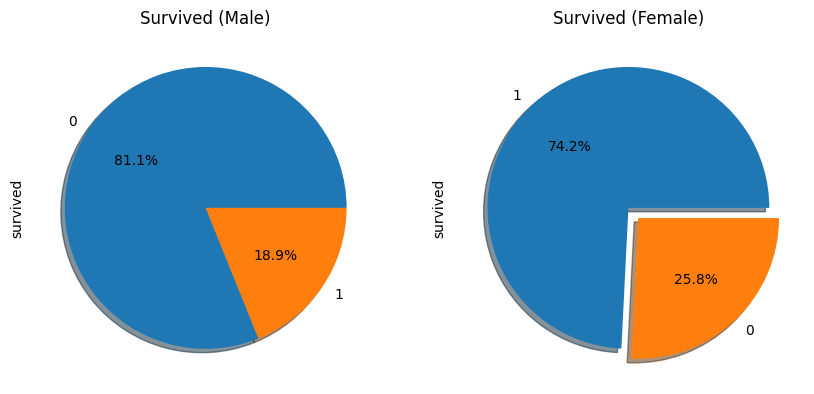

In [ ]:
f,ax = plt.subplots(1, 2, figsize = (10, 5))

titanic['survived'][titanic['sex'] == 'male'].value_counts().plot.pie(explode = [0,0], autopct = '%1.1f%%', ax = ax[0], shadow = True)
titanic['survived'][titanic['sex'] == 'female'].value_counts().plot.pie(explode = [0,0.1], autopct = '%1.1f%%', ax = ax[1], shadow = True)
ax[0].set_title('Survived (Male)')
ax[1].set_title('Survived (Female)')

plt.show()

### 3.3 등급별 생존자 수를 차트로 나타내기

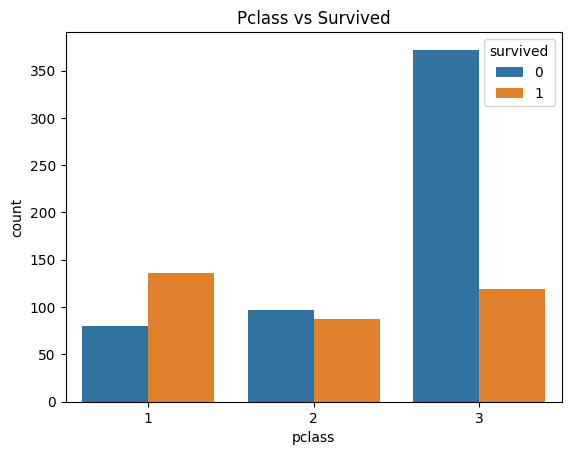

In [ ]:
sns.countplot(x='pclass', hue = 'survived',data=titanic )
plt.title('Pclass vs Survived')
plt.show()

## 4. 데이터 모델링

### 4.1 상관분석을 위한 상관계수를 구하고 저장하기

In [ ]:
titanic_corr = titanic.corr(method = 'pearson')

<ipython-input-22-47662c807e20>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  titanic_corr = titanic.corr(method = 'pearson')


In [ ]:
titanic_corr

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,0.247704,0.171647
sibsp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.247704,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.171647,-0.584471,-0.583398,-0.271832,0.404744,1.000000


In [ ]:
titanic_corr.to_csv('/content/titanic_corr.csv', index = False)

### 4.2 상관계수 확인하기

#### - 저장한 titanic_corr.csv 파일을 열어본다

### 4.3 특정 변수 사이의 상관계수 구하기

In [ ]:
titanic['survived'].corr(titanic['adult_male'])

-0.5570800422053257

In [ ]:
titanic['survived'].corr(titanic['fare'])

0.2573065223849625

## 5. 결과 시각화

### 5.1 산점도로 상관 분석 시각화하기

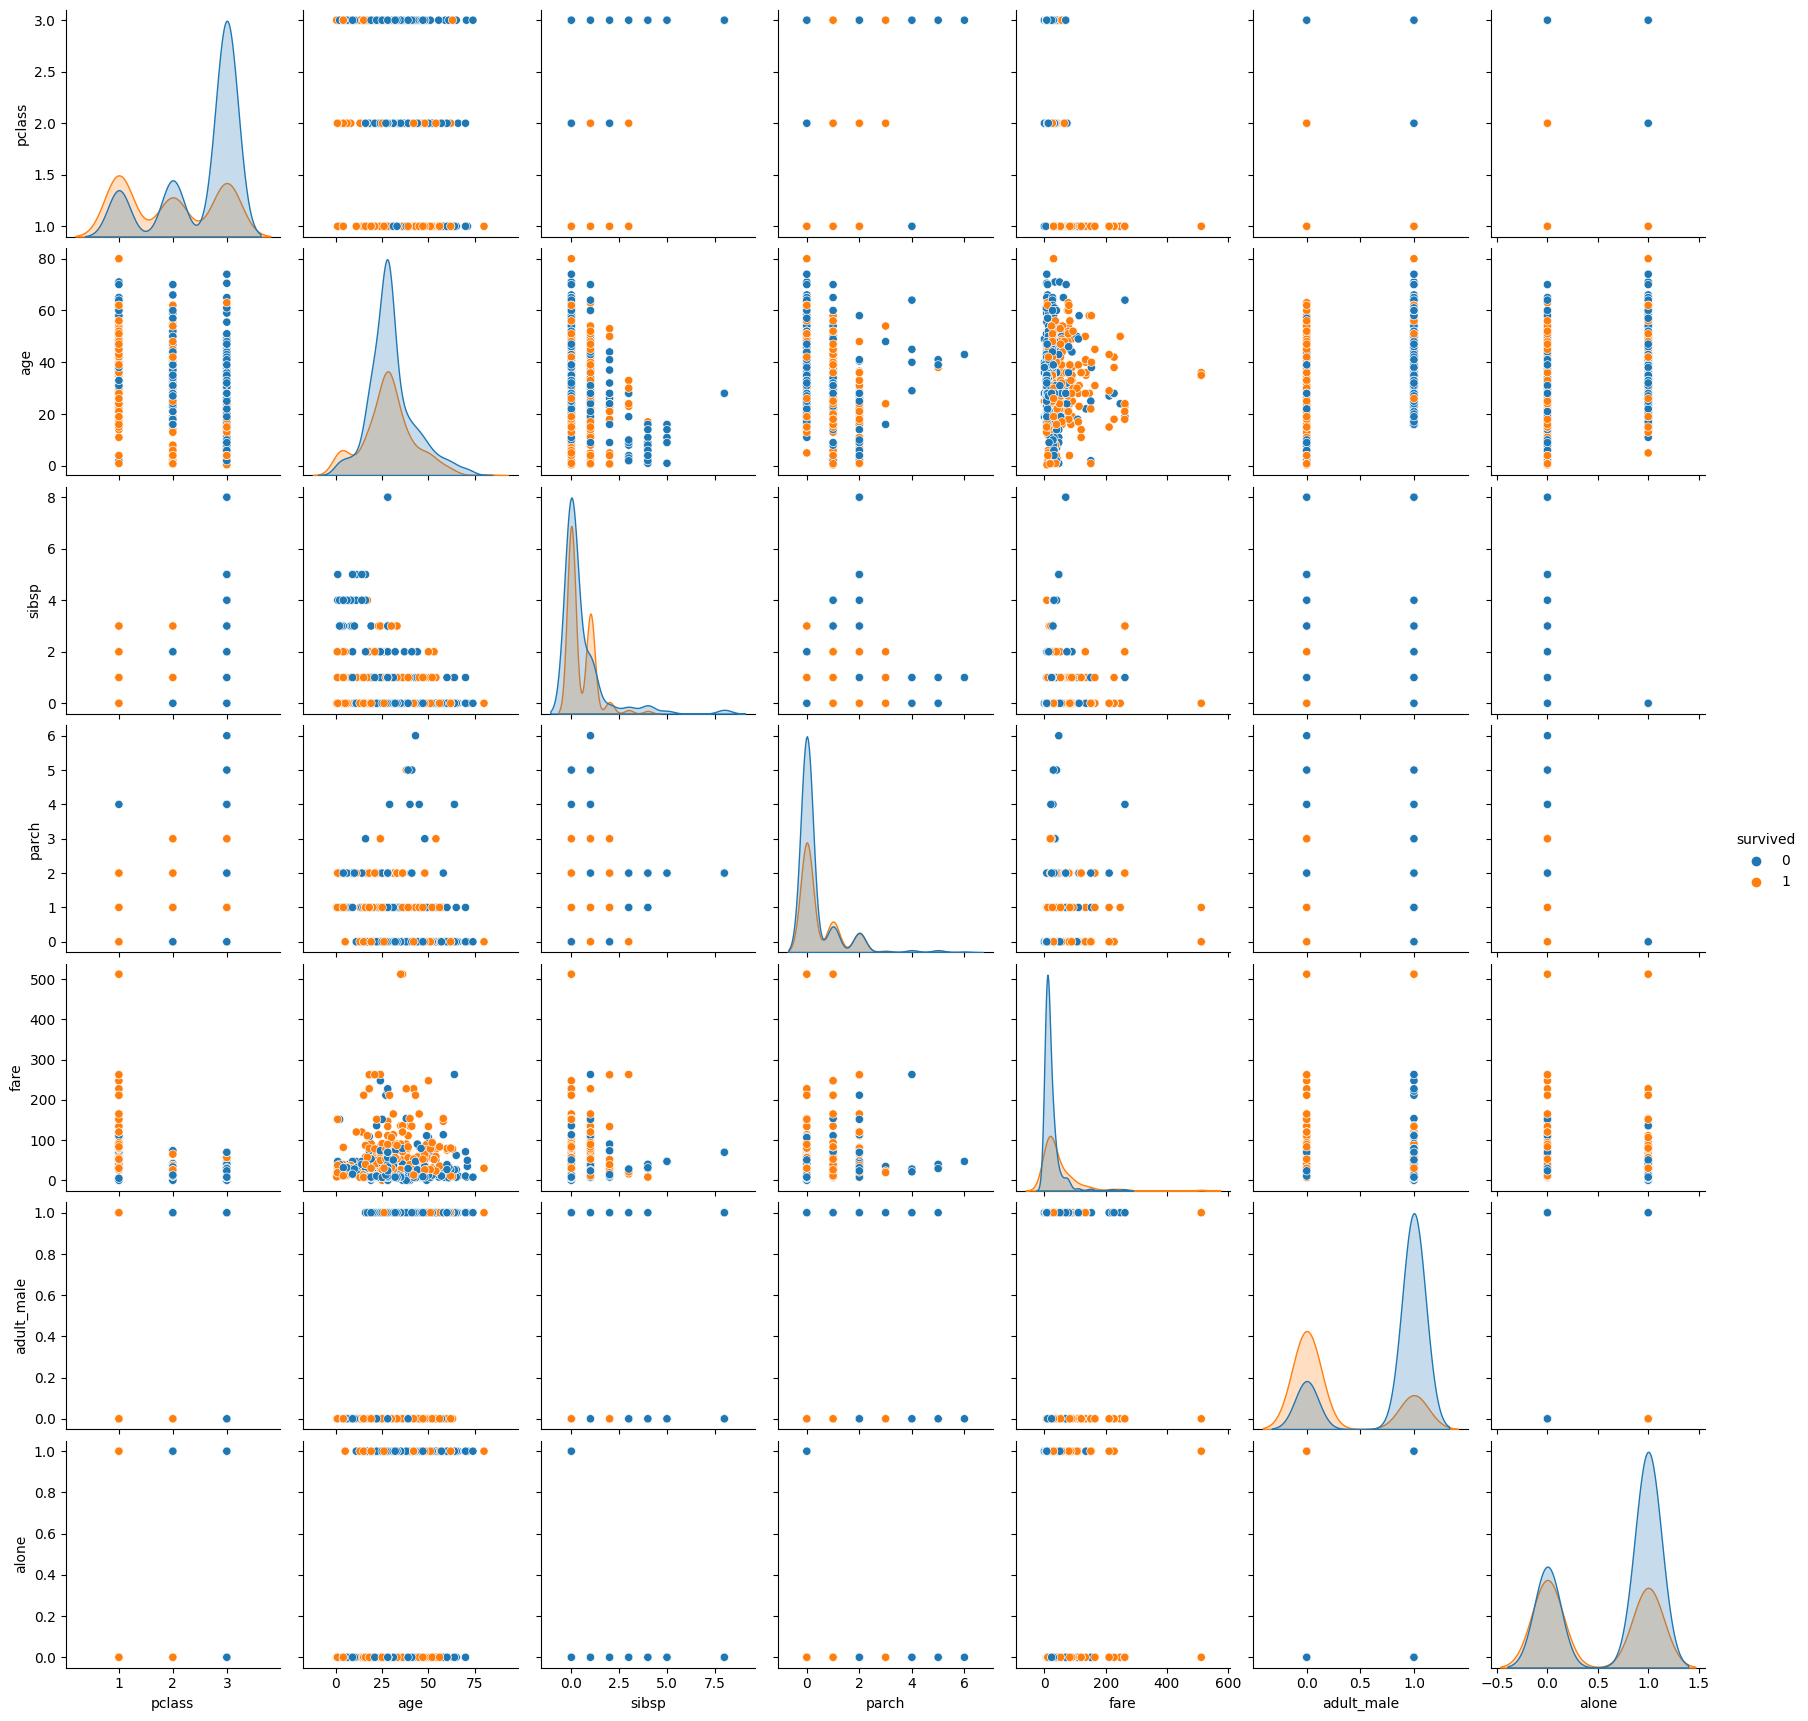

In [ ]:
sns.pairplot(titanic, hue = 'survived')

plt.show()

### 5.2 두 변수의 상관관계 시각화하기

#### - 객실 등급과 생존의 상관관계를 seaborn 패키지의 catplot으로 시각화해보자

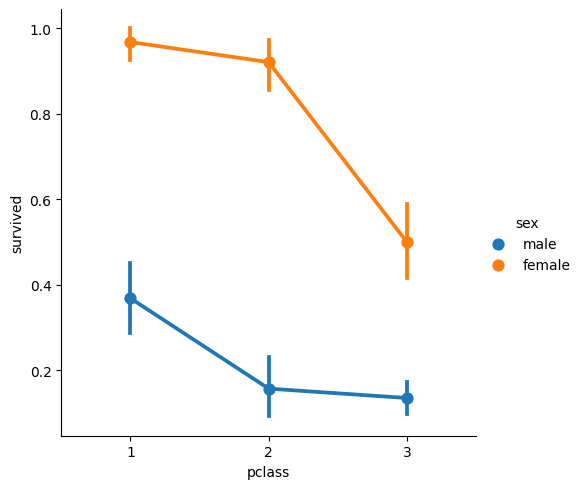

In [ ]:
sns.catplot(x = 'pclass', y = 'survived', hue = 'sex', data = titanic, kind = 'point')

plt.show()

### 5.3 변수 사이의 상관 계수를 히트맵으로 시각화하기

In [ ]:
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7

In [ ]:
titanic['age2'] = titanic['age'].apply(category_age)

In [ ]:
titanic['sex'] = titanic['sex'].map({'male':1, 'female':0})

In [ ]:
titanic['family'] = titanic['sibsp'] + titanic['parch'] + 1

In [ ]:
titanic.to_csv('/content/titanic3.csv', index = False)

In [ ]:
heatmap_data = titanic[['survived', 'sex', 'age2', 'family', 'pclass', 'fare']]

In [ ]:
cmaps = plt.colormaps()
for cm in cmaps:
    print(cm)

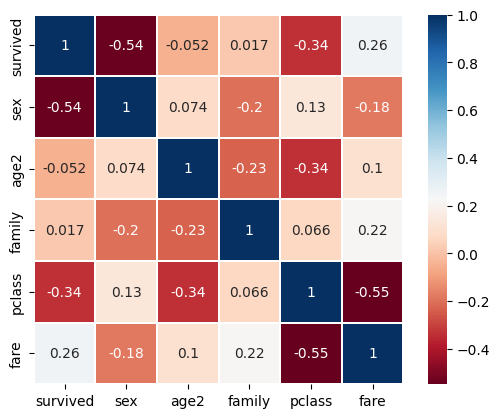

In [ ]:
colormap = plt.cm.RdBu

sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0, square = True, cmap = colormap, linecolor = 'white', annot = True,
annot_kws = {"size": 10})

plt.show()